In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df['Embarked']=df['Embarked'].fillna('S')

In [7]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
df.loc[ df['Age'] <= 15, 'AgeNew'] = 0
df.loc[(df['Age'] > 15) & (df['Age'] <= 25), 'AgeNew'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 35), 'AgeNew'] = 2
df.loc[(df['Age'] > 35) & (df['Age'] <= 45), 'AgeNew'] = 3
df.loc[(df['Age'] > 45) & (df['Age'] <= 55), 'AgeNew'] = 4
df.loc[ df['Age'] > 55, 'AgeNew'] = 5

In [10]:
df['AgeNew'] = pd.to_numeric(df['AgeNew'], downcast='integer')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [12]:
features_drop = ['Ticket','Name','Age','Cabin','PassengerId']
df_new = df.drop(features_drop, axis=1)

In [13]:
df_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeNew
0,0,3,male,1,0,7.2500,S,1
1,1,1,female,1,0,71.2833,C,3
2,1,3,female,0,0,7.9250,S,2
3,1,1,female,1,0,53.1000,S,2
4,0,3,male,0,0,8.0500,S,2


In [14]:
df_one_hot = pd.get_dummies(df_new)
df_one_hot.head()

,Survived,Pclass,SibSp,Parch,Fare,AgeNew,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,1,0,1,0,0,1
1,1,1,1,0,71.2833,3,1,0,1,0,0
2,1,3,0,0,7.9250,2,1,0,0,0,1
3,1,1,1,0,53.1000,2,1,0,0,0,1
4,0,3,0,0,8.0500,2,0,1,0,0,1


In [15]:
df_one_hot.dtypes

Survived        int64
Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
AgeNew           int8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [16]:
X = df_one_hot.drop(['Survived','Sex_female','Embarked_C'], axis=1)
y = df_one_hot['Survived']

In [17]:
X.head()

,Pclass,SibSp,Parch,Fare,AgeNew,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.2500,1,1,0,1
1,1,1,0,71.2833,3,0,0,0
2,3,0,0,7.9250,2,0,0,1
3,1,1,0,53.1000,2,0,0,1
4,3,0,0,8.0500,2,1,0,1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [19]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Fare']

for col in num_cols:
    scale = StandardScaler().fit(X_train[[col]])
    X_train[col] = scale.transform(X_train[[col]])
    X_test[col ] = scale.transform(X_test[[col]])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [21]:
X_train.head()

,Pclass,SibSp,Parch,Fare,AgeNew,Sex_male,Embarked_Q,Embarked_S
811,3,0,0,-0.154959,3,1,0,1
29,3,0,0,-0.499972,2,1,0,1
49,3,1,0,-0.289745,1,0,0,1
105,3,0,0,-0.499972,2,1,0,1
616,3,1,1,-0.361913,2,1,0,1


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

tf.random.set_seed(42)

In [23]:
NUM_FEATURES = 8                # 8 features so input_shape is 8
NUM_CLASSES = 1

In [24]:
model = Sequential([
    layers.Dense(128, input_shape=[NUM_FEATURES]),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.1e-2)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

In [27]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [28]:
EPOCHS = 200

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping    = EarlyStopping(monitor='val_loss', patience=50)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=20, min_lr=1e-5, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

CALLBACKS = [early_stopping, reduce_lr, model_checkpoint]

In [30]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    verbose = 1)

Epoch 1/200
23/23 [==============================] - 1s 14ms/step - loss: 0.6072 - accuracy: 0.6629 - val_loss: 0.5489 - val_accuracy: 0.7430 - lr: 0.0010
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5418 - accuracy: 0.7289 - val_loss: 0.4933 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7584 - val_loss: 0.4761 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7711 - val_loss: 0.4592 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.7809 - val_loss: 0.4544 - val_accuracy: 0.8436 - lr: 0.0010
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7711 - val_loss: 0.4575 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.

(0.01, 1e-06, 0.4, 0.8)

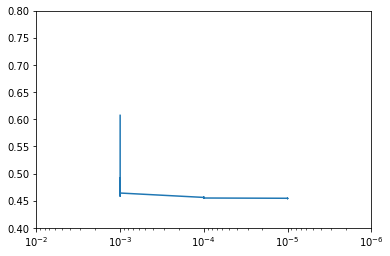

In [31]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-2, 1e-6, 0.4, 0.8])

<Figure size 432x288 with 0 Axes>

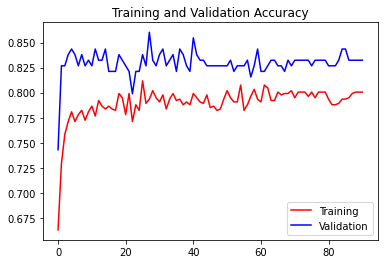

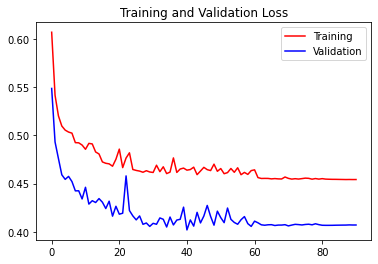

<Figure size 432x288 with 0 Axes>

In [32]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [33]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8324


[0.4070189893245697, 0.832402229309082]

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
print(y_preds[:8])
y_preds = np.round(y_preds)
print(y_preds[:8])

[[0.5138372 ]
 [0.228502  ]
 [0.30379885]
 [0.12274536]
 [0.84543085]
 [0.37616694]
 [0.14993101]
 [0.06618077]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [35]:
confusion_matrix(y_test, y_preds)

array([[101,  11],
       [ 19,  48]])

In [36]:
model.save("best_model_manual.h5")

In [37]:
loaded_model = tf.keras.models.load_model("best_model_manual.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [38]:
loaded_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8324


[0.4070189893245697, 0.832402229309082]